Excercise 6.3 Geographic Visualizations

# Import data and libraries

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import folium
import json

from folium.plugins import StripePattern
import geopandas as gpd
from shapely.geometry import Point

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Import ".json" file for the U.S. 

states_geo = r'C:/Users/corinagugulus/Achievement 6/Prepared Data/us-states.json'

In [5]:
states_geo

'C:/Users/corinagugulus/Achievement 6/Prepared Data/us-states.json'

In [6]:
#Set path
path = r'/Users/corinagugulus/Achievement 6/'

In [7]:
# Import the df_profile data

df = pd.read_csv(os.path.join(path, 'Prepared Data','df_profile.csv'), index_col = False, low_memory = False)

In [8]:
df.head()

,ID_Python,ID,Amenities,Bathrooms,Bedrooms,Currency,Fee,Has_Photo,Pets_Allowed,Price,Price_Display,Price_Type,Square_Feet,Address,Cityname,State,Latitude,Longitude,Source,Time
0,0,5667221504,Garbage Disposal Pool,2,0,USD,NaN,Thumbnail,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5509134203,please do not ask On site full service propert...,2,0,USD,NaN,Yes,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5509243784,one bathrooms on 1 1/2 floors. The loft bedroo...,1,0,USD,NaN,No,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5508842712,ParkingPool,1,0,USD,NaN,No,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5508842281,Two BR One BA;Rare find beautiful update 2BD/o...,1,2,USD,NaN,Yes,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(99117, 20)

# Data wrangling

In [10]:
#Look at column names
df.columns

Index(['ID_Python', 'ID', 'Amenities', 'Bathrooms', 'Bedrooms', 'Currency',
       'Fee', 'Has_Photo', 'Pets_Allowed', 'Price', 'Price_Display',
       'Price_Type', 'Square_Feet', 'Address', 'Cityname', 'State', 'Latitude',
       'Longitude', 'Source', 'Time'],
      dtype='object')

In [11]:
#Dropping ID, Currency, Price_Display, Price_Type, Address, Time columns because they are not needed for analysis
df.drop(['ID_Python','ID','Currency', 'Price_Display', 'Price_Type', 'Address', 'Time', 'Cityname'], axis = 1, inplace = True)

In [12]:
df.columns

Index(['Amenities', 'Bathrooms', 'Bedrooms', 'Fee', 'Has_Photo',
       'Pets_Allowed', 'Price', 'Square_Feet', 'State', 'Latitude',
       'Longitude', 'Source'],
      dtype='object')

#Questions

What do I want to look at?
I would like to find the price for each apartment that allows pets in each state.
I would like to find the top ten states with the highest apartment price.
I would like to see the ditribution of price by state.
I would like to see the average square feet by state.

In [13]:
#Create a list of necessary columns
columns = ['Amenities', 'Bathrooms', 'Bedrooms', 'Fee', 'Has_Photo','Pets_Allowed', 'Price', 'Square_Feet', 'State']

In [14]:
#Createa a subset
df_subset = df[columns]

In [15]:
df_subset.head()

,Amenities,Bathrooms,Bedrooms,Fee,Has_Photo,Pets_Allowed,Price,Square_Feet,State
0,Garbage Disposal Pool,2,0,NaN,Thumbnail,NaN,1,0,NaN
1,please do not ask On site full service propert...,2,0,NaN,Yes,NaN,1,0,NaN
2,one bathrooms on 1 1/2 floors. The loft bedroo...,1,0,NaN,No,NaN,1,0,NaN
3,ParkingPool,1,0,NaN,No,NaN,1,0,NaN
4,Two BR One BA;Rare find beautiful update 2BD/o...,1,2,NaN,Yes,NaN,1,0,NaN


In [16]:
df_subset.shape

(99117, 9)

# Conduct consistency checks

#Missing values check

In [17]:
#Check for missing values
df_subset.isnull().sum()

Amenities         166
Bathrooms           0
Bedrooms            0
Fee             94660
Has_Photo       94258
Pets_Allowed    96811
Price               0
Square_Feet         0
State           97982
dtype: int64

In [18]:
# Create a subset, df_nan_fee, to view missing values in 'Fee' column
df_nan_fee = df_subset[df_subset['Fee'].isnull() == True]

In [19]:
#Create subset without missing 'fee' value
df_subset_F = df_subset[df_subset['Fee'].isnull() == False]

In [20]:
df_subset_F

,Amenities,Bathrooms,Bedrooms,Fee,Has_Photo,Pets_Allowed,Price,Square_Feet,State
56,Mount Airy21771,1,1,No,Thumbnail,NaN,200,250,Maryland
57,One BA safe neighborhood;20 x 40 Storage Unit ...,1,0,No,Yes,NaN,200,800,Arkansas
60,One time $75 Dogs - one allowed Max weight 80 ...,1,2,No,Yes,NaN,313,880,Colorado
61,One BA;CUTE LITTLE 1 BEDs / 1 BATHROOMs UPSTAI...,1,1,No,No,NaN,350,600,Arkansas
62,bright gas stove,1,0,No,Yes,NaN,375,400,Ohio
...,...,...,...,...,...,...,...,...,...
7934,washer-dryer hook ups appliances,2,3,No,Yes,Cats,0,0,NaN
7963,Two BA Loft: Herndon VA 20171;Where elegance m...,2,2,No,Thumbnail,Cats,0,0,NaN
7965,Four BR One BA for rent. Dog OK!;Freshly Renov...,1,4,No,Yes,Cats,0,0,NaN
7966,550/mo + $50/mo pet rent second Ave Lofts &#38...,1,1,No,Thumbnail,Cats,0,0,NaN


In [21]:
# Create a subset, df_nan_State, to view missing values in 'name' column
df_nan_s = df_subset_F[df_subset_F['State'].isnull() == True]

In [22]:
#Create subset without missing 'state' values
df_subset_state = df_subset_F[df_subset_F['State'].isnull() == False]

In [23]:
# Create a subset, df_nan_Pets, to view missing values in 'Pets_Allowed' column
df_nan_p = df_subset_state[df_subset_state['Pets_Allowed'].isnull() == True]

In [24]:
#Create subset without missing 'Pets_Allowed' values
df_subset_Pets = df_subset_state[df_subset_state['Pets_Allowed'].isnull() == False]

In [25]:
df_profile_pr = df_subset_Pets

In [26]:
#Last Check for NaN
df_profile_pr.isnull().sum()

Amenities       0
Bathrooms       0
Bedrooms        0
Fee             0
Has_Photo       0
Pets_Allowed    0
Price           0
Square_Feet     0
State           0
dtype: int64

In [27]:
df_profile_pr.shape

(80, 9)

#Duplicates check

In [28]:
dups = df_profile_pr.duplicated()

In [29]:
dups.shape # no dups

(80,)

#Extreme values check

<Axes: xlabel='Price', ylabel='Count'>

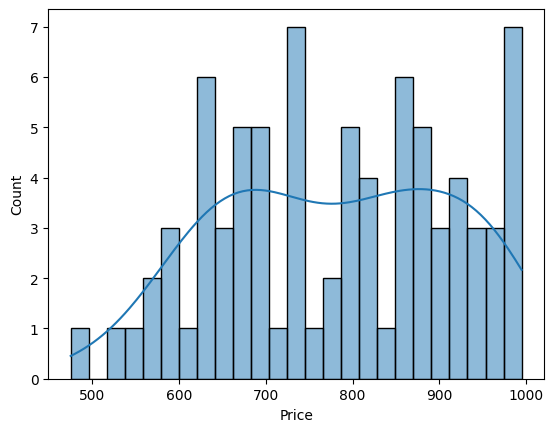

In [30]:
#Extreme value checks 'Price'
sns.histplot(df_profile_pr['Price'], bins = 25, kde = True)

<Axes: xlabel='Square_Feet', ylabel='Count'>

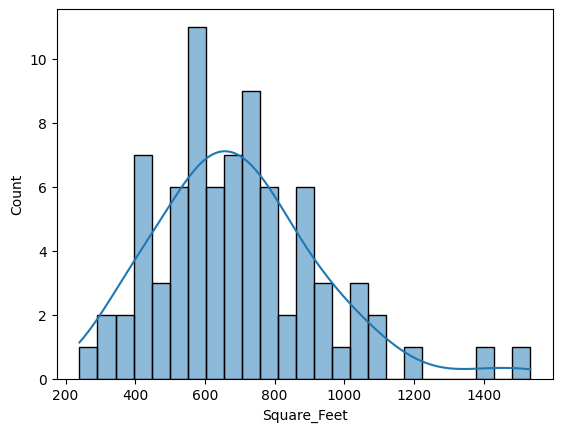

In [31]:
#Extreme value checks 'Square_Feet'
sns.histplot(df_profile_pr['Square_Feet'], bins = 25, kde = True)

In [32]:
# Create a data frame with just the states and the values for Price we want plotted

data_to_plot = df_profile_pr[['State','Price']]
data_to_plot.head()

,State,Price
91,Ohio,475
128,Iowa,525
145,North Carolina,550
166,Tennessee,575
175,Nebraska,575


In [33]:
#Read the Json data

geojson_url = 'https://coach-courses-us.s3.amazonaws.com/public/courses/data-immersion/A6/6.3/us-states.json'

In [34]:
geojson_url

'https://coach-courses-us.s3.amazonaws.com/public/courses/data-immersion/A6/6.3/us-states.json'

In [35]:
import folium

In [36]:
m = folium.Map(location = [40, -95], zoom_start = 4)


folium.Choropleth(
    geo_data = geojson_url, 
    data = data_to_plot,
    columns = ['State', 'Price'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Distribution of Price by State").add_to(m)

folium.LayerControl().add_to(m)

m


In [37]:
m.save('plot_data.html')

# Discuss Results

The above map answered the question about the prices distribution by state. We noticed that in North Carolina
prices are between 550 and 624 and in states such as Tennessee and Alabama the prices are between 624 and 698. The price is high in states such as Washington, Detroit, New York and Texas. There are many states in black on the map and this could mean that there is not enough info in the database for these states. 

In [116]:
# Create a data frame with just the states and the values for Price we want plotted

data_to_plot1 = df_profile_pr[['State','Square_Feet']]
data_to_plot1.head()

,State,Square_Feet
91,Ohio,558
128,Iowa,530
145,North Carolina,402
166,Tennessee,680
175,Nebraska,650


In [38]:
m1 = folium.Map(location = [40, -95], zoom_start = 4)


folium.Choropleth(
    geo_data = geojson_url, 
    data = data_to_plot1,
    columns = ['State', 'Square_Feet'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Distribution of Square_Feet by State").add_to(m1)

folium.LayerControl().add_to(m1)

m1


NameError: name 'data_to_plot1' is not defined

In [119]:
m1.save('plot_data1.html')

# Discuss Results

In terms of square footage, we notice that there is no info for states such as Maine, South Dakota, Atlanta (in black on the map above) and even for the New York city. However, for the state New York the overall square footage is between 240 and 456, the smallest across USA. The highest squarefootage is in Ohio. If we compare this state in terms of square feets and price we notice that the prices are high too in this state. But in states such as Iowa although the square feets are between 887 and 1103 the price is somewhere between 773 and 847. Comparing other states too we can't state that if the larger the apartments/houses then the higher the price. Other factors need to be taken into account and a further analysis on this is required. 